In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading and exploratory analysis

In [80]:
#read in the data set
#consists of 1.5 million million reviews 
df = pd.read_csv("beer_reviews.csv")
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [81]:
unique_breweries = df['brewery_id'].unique()
unique_reviewers = df['review_profilename'].unique()
unique_styles = df['beer_style'].unique()
unique_beers = df['beer_beerid'].unique()

print(f"There are {len(unique_breweries)} unique breweries.")
print(f"{len(unique_reviewers)} unique reviewers.")
print(f"{len(unique_styles)} unique beers styles.")
print(f"{len(unique_beers)} unique beers.\n")
print(df.shape)

There are 5840 unique breweries.
33388 unique reviewers.
104 unique beers styles.
66055 unique beers.

(1586614, 13)


In [82]:
#Change review_time to datetime
df['review_time'] = pd.to_datetime( df['review_time'], unit='s')
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


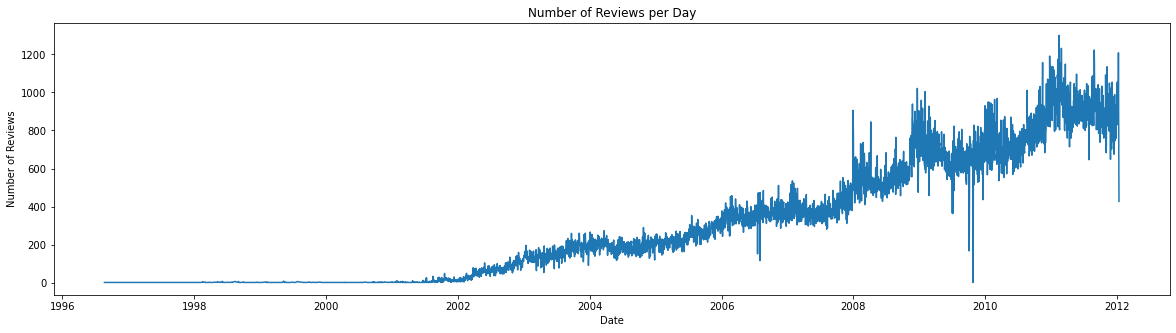

In [83]:
group_by_date = df[['review_time']].groupby( df['review_time'].dt.date ).agg(['count'])

plt.figure(figsize=(20,5))
plt.plot(group_by_date)
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Day')
plt.show()

In [84]:
#data analysis based on beer style
beer_styles = df[['beer_style']]
beer_styles['beer_style'].value_counts(dropna=False).head()

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
Name: beer_style, dtype: int64

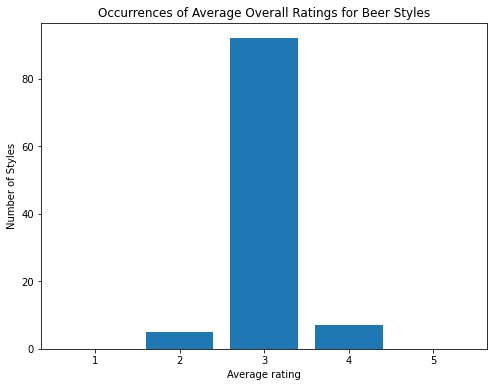

[ 0.  5. 92.  7.  0.]


In [85]:
#group beer styles into average overall ratings and count
beer_styles = df.groupby(['beer_style'])
beer_styles = beer_styles.mean()
beer_styles = beer_styles.reset_index()
fig, ax = plt.subplots(figsize=(8,6))
x = range(1,6)
counts = np.zeros(5)
for val in beer_styles['review_overall']:
    if val < 2:
        counts[0] += 1
    elif val < 3:
        counts[1] += 1
    elif val < 4:
        counts[2] += 1
    elif val < 5:
        counts[3] += 1
    else:
        counts[4] += 1
        
ax.bar(x, counts)
ax.set_xlabel('Average rating')
ax.set_ylabel('Number of Styles')
ax.set_title('Occurrences of Average Overall Ratings for Beer Styles')
plt.show()

print(counts)

In [86]:
#find lowest and highest rated beers
sorted_beer_styles = beer_styles.sort_values('review_overall')
lowest_rated_style = [list(sorted_beer_styles['beer_style'])[0], list(sorted_beer_styles['review_overall'])[0]]
highest_rated_style = [list(sorted_beer_styles['beer_style'])[-1], list(sorted_beer_styles['review_overall'])[-1]]

print(f"Highest rated beer style: {highest_rated_style[0]} ({np.round(highest_rated_style[1], 4)})")
print(f"Lowest rated beer style: {lowest_rated_style[0]} ({np.round(lowest_rated_style[1], 4)})")

Highest rated beer style: American Wild Ale (4.0933)
Lowest rated beer style: Low Alcohol Beer (2.5783)


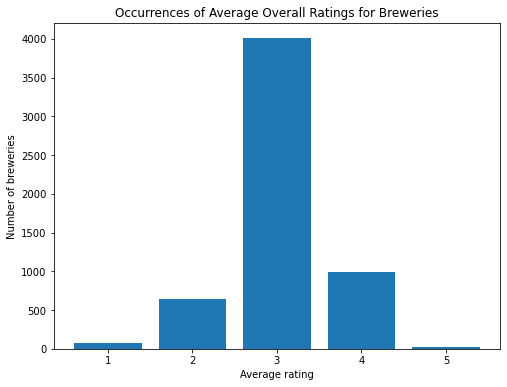

,brewery_name,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
0,'t Hofbrouwerijke,13160.0,3.702703,3.783784,3.851351,3.540541,3.621622,6.789189,35306.864865
1,(512) Brewing Company,17863.0,4.065789,4.001645,4.057566,3.958882,4.055921,7.149662,51099.884868
2,10 Barrel Brewing Co.,16873.0,3.732143,3.571429,3.815476,3.619048,3.636905,6.066667,55452.488095
3,1516 Brewing Company,4473.0,4.132353,3.911765,4.191176,3.897059,4.073529,6.266667,38128.000000
4,16 Mile Brewing Company,20688.0,3.570652,3.402174,3.766304,3.614130,3.472826,6.033696,55400.184783


In [87]:

breweries = df.groupby(['brewery_name'])
breweries = breweries.mean()
breweries = breweries.reset_index()
fig, ax = plt.subplots(figsize=(8,6))
x = range(1,6)
counts = np.zeros(5)
for val in breweries['review_overall']:
    if val < 2:
        counts[0] += 1
    elif val < 3:
        counts[1] += 1
    elif val < 4:
        counts[2] += 1
    elif val < 5:
        counts[3] += 1
    else:
        counts[4] += 1


ax.bar(x, counts)
ax.set_xlabel('Average rating')
ax.set_ylabel('Number of breweries')
ax.set_title('Occurrences of Average Overall Ratings for Breweries')
plt.show()
breweries.head()

In [88]:
print('Average overall review: ', np.round(np.mean(df['review_overall']),4))
print('Total number of breweries for each rating: ', counts)

Average overall review:  3.8156
Total number of breweries for each rating:  [  78.  641. 4009.  993.   21.]


In [89]:

breweries_sorted = breweries.sort_values('review_overall')
#print(breweries_sorted.head(),'\n')
lowest_rated_style = [list(breweries_sorted['brewery_name'])[0], list(breweries_sorted['review_overall'])[0]]
highest_rated_style = [list(breweries_sorted['brewery_name'])[-1], list(breweries_sorted['review_overall'])[-1]]
print(f"Highest rated brewery: {highest_rated_style[0]} ({highest_rated_style[1]})")
print(f"Lowest rated brewery: {lowest_rated_style[0]} ({lowest_rated_style[1]})")

Highest rated brewery: Elizabeth Street Brewery (5.0)
Lowest rated brewery: Red Dot Brewhouse (1.0)


These preliminary results give us a better understanding of our data and the general type of reviews that were given. Now that we know them we are going to attempt to use collaborative filtering to generate profile reccomendations based on the data. 

# Collaborative Filtering
### We will be using only the first 200,000 data points for the sake of memory and runt time

Our first reccomendation model will be build off of collaboritive filtering

In [90]:
#grab the first 200,000 data points
df_new = df[:200000]
print(len(df_new))

200000


### Build a col. filtering matrix based on beer styles against users overall review

In [91]:
beer_styles_df = df_new.groupby(['review_profilename', 'beer_style'])
beer_styles_df.first()

brewery_id  \
review_profilename beer_style                                        
0110x011           American Amber / Red Ale                   5318   
                   American Barleywine                         396   
                   American Double / Imperial IPA             3818   
                   American Double / Imperial Pilsner         5318   
                   American Double / Imperial Stout           1199   
...                                                            ...   
zymurgy4all        Rauchbier                                   263   
                   Vienna Lager                              14551   
zymurgywhiz        American IPA                                140   
zythus             Extra Special / Strong Bitter (ESB)         140   
zyzygy             Altbier                                      94   

                                                                                        brewery_name  \
review_profilename beer_style                                                                          
0110x011           American Amber / Red Ale                        Port Brewing Company / Pizza Port   
                   American Barleywine                                      AleSmith Brewing Company   
                   American Double / Imperial IPA                      Southern Tier Brewing Company   
                   American Double / Imperial Pilsner              Port Brewing Company / Pizza Port   
                   American Double / Imperial Stout                         Founders Brewing Company   
...                                                                                              ...   
zymurgy4all        Rauchbier                                      Brauerei Heller-Trum / Schlenkerla   
                   Vienna Lager                         Green Valley Brewing Company (Crooked Creek)   
zymurgywhiz        American IPA                                            Sierra Nevada Brewing Co.   
zythus             Extra Special / Strong Bitter (ESB)                     Sierra Nevada Brewing Co.   
zyzygy             Altbier                                                    Long Trail Brewing Co.   

                                                               review_time  \
review_profilename beer_style                                                
0110x011           American Amber / Red Ale            2009-03-16 06:11:52   
                   American Barleywine                 2009-06-04 05:20:00   
                   American Double / Imperial IPA      2008-09-06 05:40:51   
                   American Double / Imperial Pilsner  2008-10-15 03:11:14   
                   American Double / Imperial Stout    2009-07-12 04:15:18   
...                                                                    ...   
zymurgy4all        Rauchbier                           2008-06-08 23:27:35   
                   Vienna Lager                        2007-02-02 00:13:25   
zymurgywhiz        American IPA                        2009-01-08 22:22:47   
zythus             Extra Special / Strong Bitter (ESB) 2009-03-21 18:02:53   
zyzygy             Altbier                             2006-02-03 23:13:01   

                                                        review_overall  \
review_profilename beer_style                                            
0110x011           American Amber / Red Ale                        2.5   
                   American Barleywine                             4.0   
                   American Double / Imperial IPA                  3.0   
                   American Double / Imperial Pilsner              4.0   
                   American Double / Imperial Stout                4.5   
...                                                                ...   
zymurgy4all        Rauchbier                                       3.5   
                   Vienna Lager                                    3.0   
zymurgywhiz        American IPA      

In [92]:
#build matrix
profile_names = df_new['review_profilename'].unique()
beer_styles = df_new['beer_style'].unique()
print(len(profile_names))
print(len(beer_styles))

#our matrix will consist of users as the columns and beer_styles (items) as the rows
#initialize an empty matrix of size (items, users) 
ratings = np.empty((len(beer_styles), len(profile_names)))
ratings[:] = np.NaN
print(ratings.shape)

15482
103
(103, 15482)


In [93]:
num_reviews = 0
num_blank_reviews = 0
for idx, style in enumerate(beer_styles):
    for jdx, name in enumerate(profile_names):
        #see if the review exists
        try:
            review = beer_styles_df.get_group( (name, style) )[ 'review_overall' ]
            num_reviews += 1
        
            if len(review) > 1:
                review = np.mean( review )
                ratings[ idx, jdx ] = review
            else:
                ratings[ idx, jdx ] = review
                
        except:
            num_blank_reviews += 1
            continue #leave entry as NaN if the user has not reviewed

In [94]:
print(f'There are {num_reviews} total reviews for beer styles, and {num_blank_reviews} empty reviews.')

There are 105748 total reviews for beer styles, and 1488898 empty reviews.


In [95]:
#find the average number of ratings per user
num_user_ratings = []
for idx, name in enumerate(profile_names):
    user_ratings = ratings[ :, idx ]
    num_user_ratings.append( np.count_nonzero( ~np.isnan(user_ratings) ))
    
    
print(f'The average user has rated {np.round(np.mean(num_user_ratings), 4)} beer styles.')

#find the average number of ratings per item
num_item_ratings = []
for idx, style in enumerate(beer_styles):
    item_ratings = ratings[ idx, : ]
    num_item_ratings.append( np.count_nonzero( ~np.isnan(item_ratings) ))

print(f'The average beer style has been reviewed by {np.round(np.mean(num_item_ratings), 4)} users.')

The average user has rated 6.8304 beer styles.
The average beer style has been reviewed by 1026.6796 users.


In [96]:
#create a data frame from the beer style rating matrix
df_style_ratings = pd.DataFrame(ratings)
df_style_ratings.rename(columns={ idx: name for idx, name in enumerate(profile_names) }, index={ idx: style for idx, style in enumerate(beer_styles)}, inplace=True)
df_style_ratings.head()

,stcules,johnmichaelsen,oline73,Reidrover,alpinebryant,LordAdmNelson,augustgarage,fodeeoz,MadeInOregon,rawthar,...,Stevoli,Microbrew8,TheLightweight,snekse,mrseano,wholelottalove,olimax,patrick16o,Countpopeula,Antagony
Hefeweizen,3.000000,3.750000,2.0000,3.5,NaN,NaN,4.375000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
English Strong Ale,3.333333,4.250000,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foreign / Export Stout,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
German Pilsener,3.071429,4.800000,4.0000,4.0,NaN,NaN,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Double / Imperial IPA,NaN,3.515625,3.8125,3.5,3.5,4.0,3.888889,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Build a collaborative filtering matrix based on brewery against users overall review

In [97]:
breweries_df = df_new.groupby(['review_profilename', 'brewery_name'])
breweries_df.first()

brewery_id         review_time  \
review_profilename brewery_name                                                
0110x011           AleSmith Brewing Company          396 2009-07-01 05:37:44   
                   Bear Republic Brewing Co.         610 2009-06-05 00:10:34   
                   Brouwerij Verhaeghe               641 2008-06-25 17:23:12   
                   Founders Brewing Company         1199 2009-07-12 04:15:18   
                   Green Flash Brewing Co.          2743 2009-05-03 23:25:57   
...                                                  ...                 ...   
zymurgy4all        Sierra Nevada Brewing Co.         140 2008-06-18 21:17:46   
                   Stoudts Brewing Co.               394 2008-03-01 00:17:14   
zymurgywhiz        Sierra Nevada Brewing Co.         140 2009-01-08 22:22:47   
zythus             Sierra Nevada Brewing Co.         140 2009-03-21 18:02:53   
zyzygy             Long Trail Brewing Co.             94 2006-02-03 23:13:01   

                                              review_overall  review_aroma  \
review_profilename brewery_name                                              
0110x011           AleSmith Brewing Company              4.5           4.0   
                   Bear Republic Brewing Co.             4.5           4.0   
                   Brouwerij Verhaeghe                   2.0           3.0   
                   Founders Brewing Company              4.5           4.5   
                   Green Flash Brewing Co.               4.0           4.5   
...                                                      ...           ...   
zymurgy4all        Sierra Nevada Brewing Co.             4.0           4.0   
                   Stoudts Brewing Co.                   4.0           4.5   
zymurgywhiz        Sierra Nevada Brewing Co.             4.5           4.5   
zythus             Sierra Nevada Brewing Co.             4.0           3.0   
zyzygy             Long Trail Brewing Co.                4.5           4.0   

                                              review_appearance  \
review_profilename brewery_name                                   
0110x011           AleSmith Brewing Company                 5.0   
                   Bear Republic Brewing Co.                4.5   
                   Brouwerij Verhaeghe                      3.5   
                   Founders Brewing Company                 3.5   
                   Green Flash Brewing Co.                  4.0   
...                                                         ...   
zymurgy4all        Sierra Nevada Brewing Co.                3.5   
                   Stoudts Brewing Co.                      4.0   
zymurgywhiz        Sierra Nevada Brewing Co.                4.5   
zythus             Sierra Nevada Brewing Co.                3.5   
zyzygy             Long Trail Brewing Co.                   4.0   

                                                                       beer_style  \
review_profilename brewery_name                                                     
0110x011           AleSmith Brewing Company      American Double / Imperial Stout   
                   Bear Republic Brewing Co.       American Double / Imperial IPA   
                   Brouwerij Verhaeghe                           Flanders Red Ale   
                   Founders Brewing Company      American Double / Imperial Stout   
                   Green Flash Brewing Co.                           American IPA   
...                                                                           ...   
zymurgy4all        Sierra Nevada Brewing Co.                         American IPA   
                   Stoudts Brewing Co.             American Double / Imperial IPA   
zymurgywhiz        Sierra Nevada Brewing Co.                         American IPA   
zythus             Sierra Nevada Brewing Co.  Extra Special / Strong Bitter (ESB)   
zyzygy             Long Trail Brewing Co.                                 Altbier   

            

In [101]:
#build matrix
#our matrix will consist of users as the columns and breweries (items) as the rows
#initialize an empty matrix of size (items, users) 
profile_names = df_new['review_profilename'].unique()
brewery_names = df_new['brewery_name'].unique()
print(len(profile_names))
print(len(brewery_names))

ratings = np.empty((len(brewery_names), len(profile_names)))
ratings[:] = np.NaN
print(ratings.shape)

15482
765
(765, 15482)


In [103]:
num_reviews = 0
num_blank_reviews = 0
for idx, brewery in enumerate(brewery_names):
    for jdx, name in enumerate(profile_names):
        #see if the review exists
        try:
            review = breweries_df.get_group( (name, brewery) )[ 'review_overall' ]
            num_reviews += 1
        
            if len(review) > 1:
                #if the user has reviewed the brewery multiple times, take the user's average rating of the brewery
                review = np.mean( review )
                ratings[ idx, jdx ] = review
            else:
                ratings[ idx, jdx ] = review
                
        except:
            num_blank_reviews += 1
            continue #leave entry as NaN if the user has not reviewed

In [104]:
print(f'There are {num_reviews} total reviews for beer styles, and {num_blank_reviews} empty reviews.')

There are 81404 total reviews for beer styles, and 11762326 empty reviews.


In [106]:
#find the average number of ratings per user
num_user_ratings = []
for idx, name in enumerate(profile_names):
    user_ratings = ratings[ :, idx ]
    num_user_ratings.append( np.count_nonzero( ~np.isnan(user_ratings) ))
    
    
print(f'The average user has rated {np.round(np.mean(num_user_ratings), 4)} breweries.')

#find the average number of ratings per item
num_item_ratings = []
for idx, brewery in enumerate(brewery_names):
    item_ratings = ratings[ idx, : ]
    num_item_ratings.append( np.count_nonzero( ~np.isnan(item_ratings) ))

print(f'The average brewery has been reviewed by {np.round(np.mean(num_item_ratings), 4)} users.')

The average user has rated 5.258 breweries.
The average brewery has been reviewed by 106.4105 users.


In [110]:
df_brewery_ratings = pd.DataFrame(ratings)
df_brewery_ratings.rename(columns={ idx: name for idx, name in enumerate(profile_names) }, index={ idx: brewery for idx, brewery in enumerate(brewery_names)}, inplace=True)
print(df_brewery_ratings.shape)
df_brewery_ratings.head()

(765, 15482)


,stcules,johnmichaelsen,oline73,Reidrover,alpinebryant,LordAdmNelson,augustgarage,fodeeoz,MadeInOregon,rawthar,...,Stevoli,Microbrew8,TheLightweight,snekse,mrseano,wholelottalove,olimax,patrick16o,Countpopeula,Antagony
Vecchio Birraio,2.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caldera Brewing Company,NaN,4.0,3.0,3.75,3.0,4.0,4.25,NaN,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amstel Brouwerij B. V.,NaN,NaN,NaN,3.00,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Broad Ripple Brew Pub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Moon River Brewing Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
